### Notebook Imports


In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

%matplotlib inline

### Gather Data
[Google Link](https://google.com)

In [2]:
boston_dataset = load_boston()
#type(boston_dataset) #sklearn.utils.Bunch
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data points and features

In [5]:
print("boston_dataset.data type: ", type(boston_dataset.data))
print("boston_dataset.data shape: ", boston_dataset.data.shape)
print("boston_dataset feature_names: ", boston_dataset.feature_names)

boston_dataset.data type:  <class 'numpy.ndarray'>
boston_dataset.data shape:  (506, 13)
boston_dataset feature_names:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print("boston_dataset.target Price in thousands: \n", boston_dataset.target)

boston_dataset.target Price in thousands: 
 [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29

### Data exploration with Pandas dataframes

In [7]:
# Create Pandas DataFrame
data = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)

# Add column with the price (target)
data['PRICE'] = boston_dataset.target

In [8]:
print('Print top 5 rows: \n',
      data.head())
print('Print bottom 5 rows: \n',
      data.tail())

Print top 5 rows: 
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
Print bottom 5 rows: 
         CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959

In [9]:
print('Print the number of entries per column of data: \n',
      data.count())

Print the number of entries per column of data: 
 CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64


### Cleaning data - check for the missing values

In [10]:
print(pd.isnull(data).any())

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool


In [11]:
print('Info of the data set: \n', data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB
Info of the data set: 
 None


### Visualizin - Data Historgrams, Distributions and Bar Charts

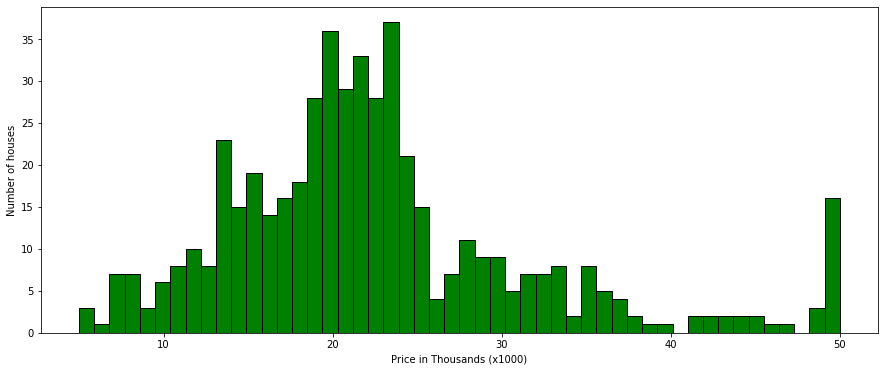

In [12]:
plt.figure(figsize=(15, 6))
plt.hist(data['PRICE'], bins=50, ec='black', color='green')
plt.xlabel('Price in Thousands (x1000)')
plt.ylabel('Number of houses')
plt.show()

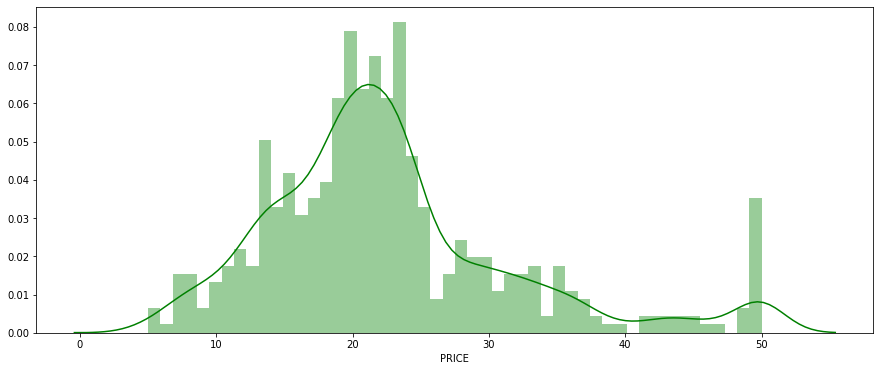

In [13]:
plt.figure(figsize=(15, 6))
sns.distplot(data['PRICE'], bins=50, color='green', hist = True, kde = True)
plt.show()

Average number of rooms:  6.284634387351787


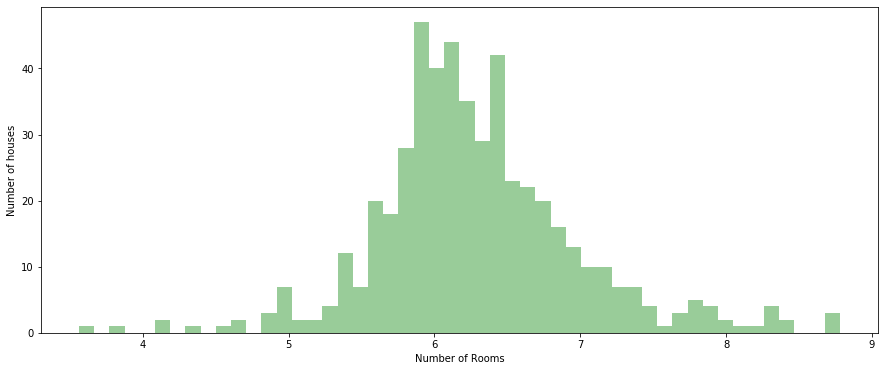

In [14]:
print('Average number of rooms: ',data['RM'].mean())
plt.figure(figsize=(15, 6))
sns.distplot(data['RM'], color='green', bins=50, hist = True, kde = False)
plt.xlabel('Number of Rooms')
plt.ylabel('Number of houses')
plt.show()

Average number of accessibility to highway:  9.549407114624506


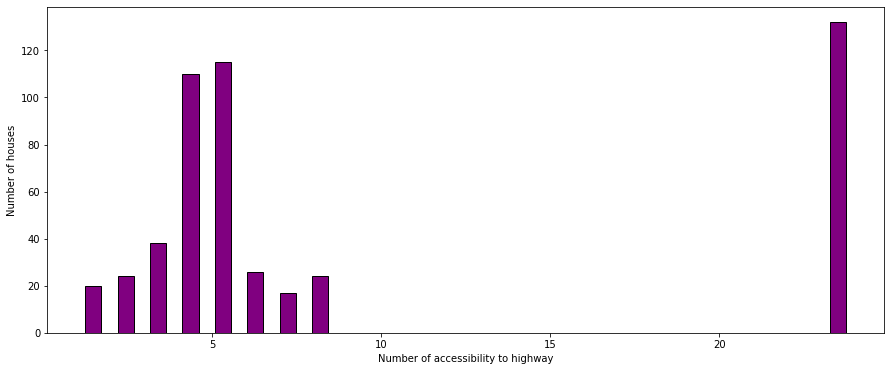

Plot with bar chart
<class 'pandas.core.series.Series'>
Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')


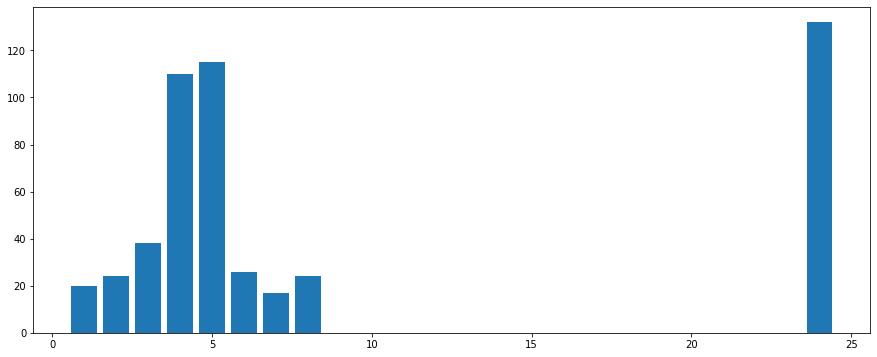

In [15]:
print('Average number of accessibility to highway: ',data['RAD'].mean())
plt.figure(figsize=(15, 6))
plt.hist(data['RAD'], color='purple', ec='black', bins=24, rwidth=0.5)
plt.xlabel('Number of accessibility to highway')
plt.ylabel('Number of houses')
plt.show()

print('Plot with bar chart')
frequency = data['RAD'].value_counts()
print(type(frequency))
print(frequency.axes[0])
plt.figure(figsize=(15, 6))
plt.bar(frequency.axes[0], height= frequency)
plt.show()

In [16]:
print(data['RAD'].value_counts())

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64


In [17]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

### Descriptive Statictics

In [18]:
print ('Min value house: ', data['PRICE'].min())
print ('Max value house: ', data['PRICE'].max())
print ('Median value house: ', data['PRICE'].median())
print ('Average value house: ', data['PRICE'].mean())

print ('Data describe', data.describe())
data.describe()

Min value house:  5.0
Max value house:  50.0
Median value house:  21.2
Average value house:  22.532806324110698
Data describe              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.0000

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [19]:
data.min()
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

### Correlation

## $$ \rho _{XY} = corr(X,Y) $$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$ 

In [20]:
print ('House price and room number - correlation Coefficient: ', data['PRICE'].corr(data['RM']))

House price and room number - correlation Coefficient:  0.695359947071539


In [21]:
print ('House price and pupil-teacher ratio by location - correlation Coefficient: ', data['PRICE'].corr(data['PTRATIO']))

House price and pupil-teacher ratio by location - correlation Coefficient:  -0.5077866855375615


In [22]:
print(data.corr()) # Default Pearson correlation Coefficient

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [23]:
mask_table = np.zeros_like(data.corr())
triangle_indecies = np.triu_indices_from(mask_table)
mask_table[triangle_indecies] =True
print(mask_table)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


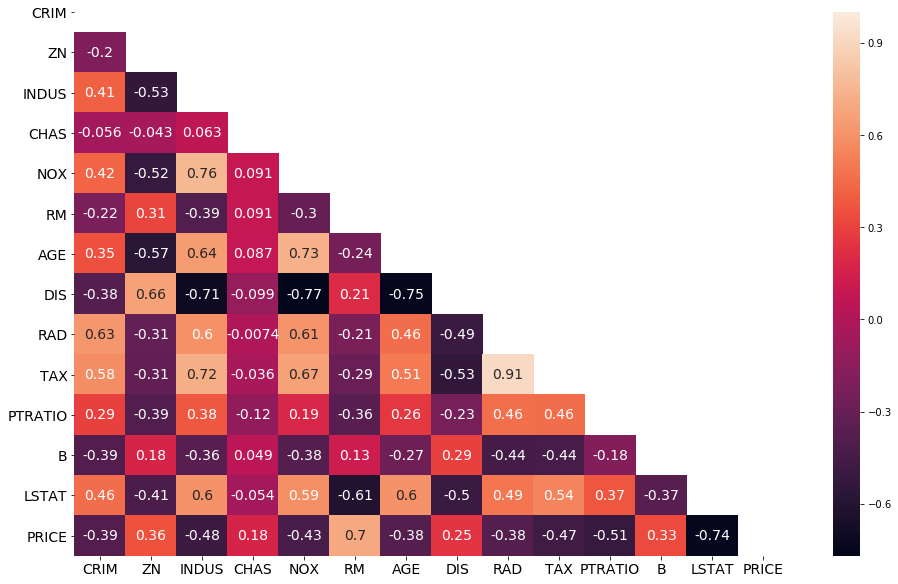

In [24]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask_table, annot=True, annot_kws={"size": 14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(14)
plt.show()

Correlation between distance and polution:  -0.769


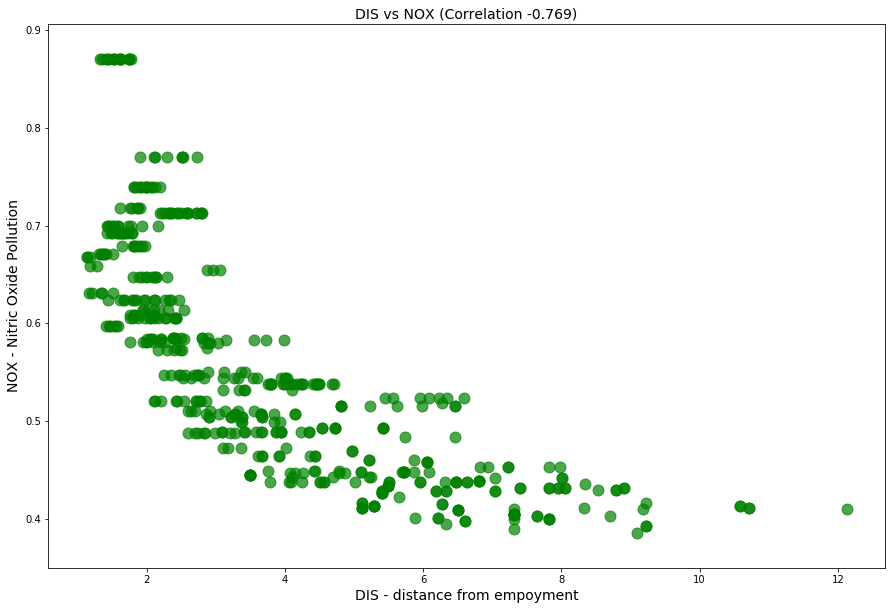

In [25]:
nox_dis_corr = data['NOX'].corr(data['DIS'])
nox_dis_corr = round(nox_dis_corr, 3)
print('Correlation between distance and polution: ', nox_dis_corr)

plt.figure(figsize=(15, 10))
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS - distance from empoyment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)
plt.scatter(x=data['DIS'], y=data['NOX'], alpha= 0.7, s=120, color="green")
plt.show()

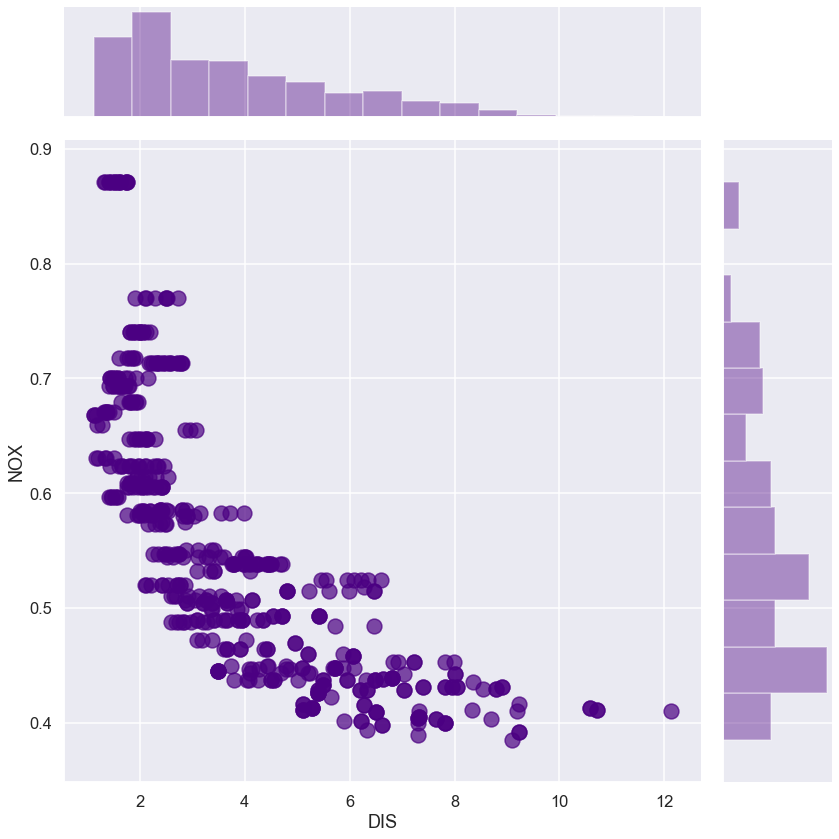

In [26]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('talk')
sns.jointplot(x=data['DIS'], y=data['NOX'], height=12, alpha=0.7, s=220, color="indigo")
plt.show()

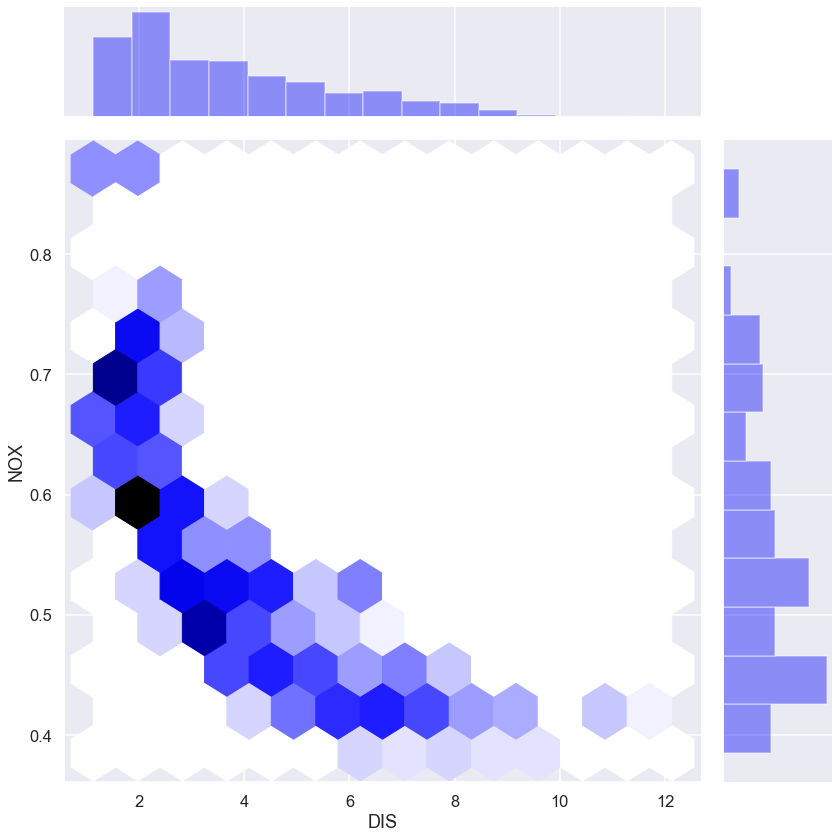

In [27]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('talk')
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='hex', height=12, color="blue")
plt.show()

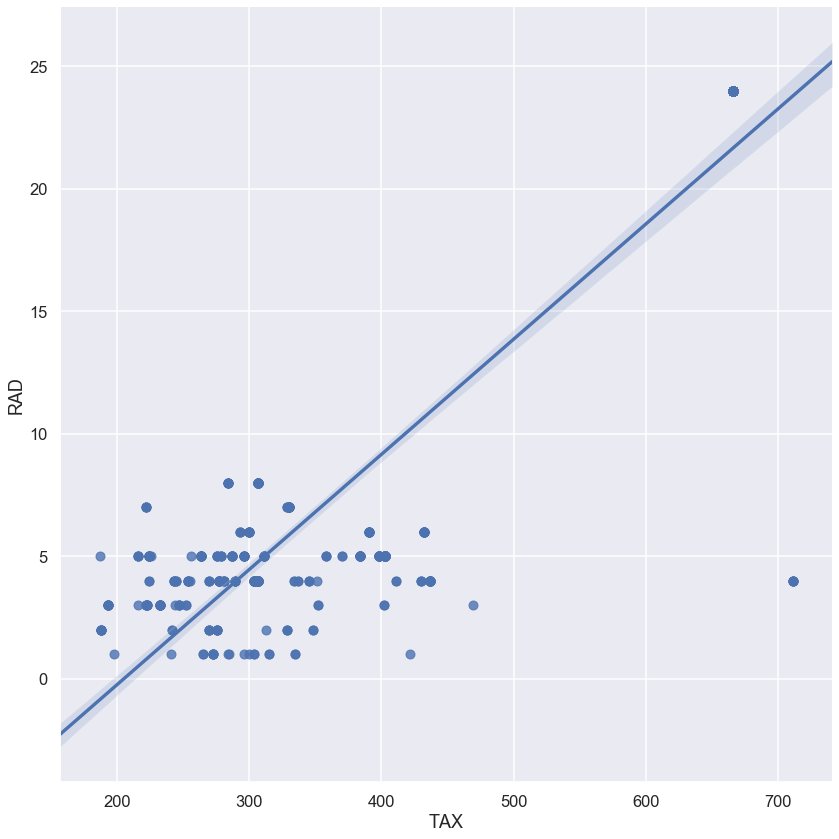

In [28]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('talk')
sns.lmplot(x='TAX', y='RAD', data = data, height=12)
plt.show()

Correlation between room number and price:  0.695


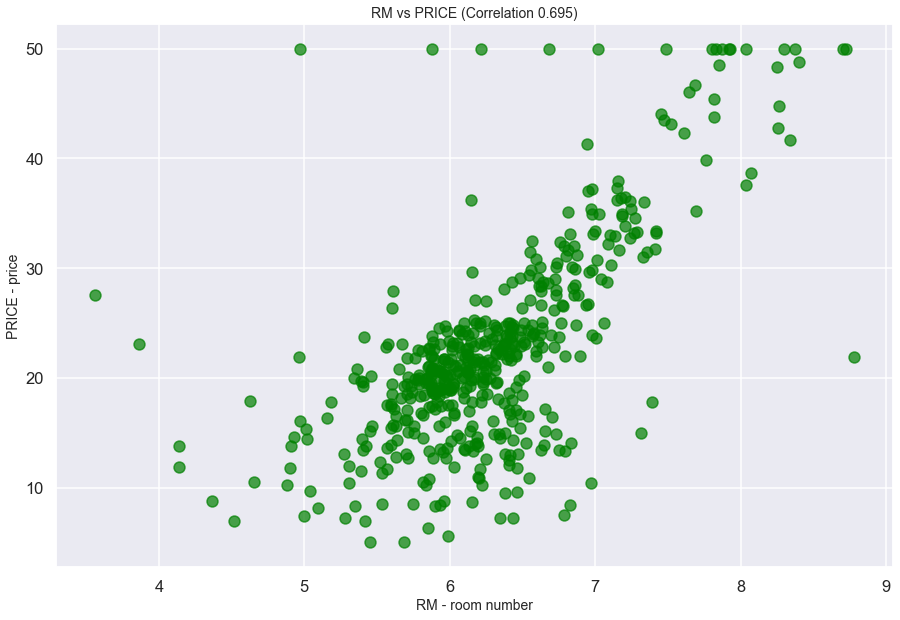

In [29]:
rm_tgt_corr = data['RM'].corr(data['PRICE'])
rm_tgt_corr = round(rm_tgt_corr, 3)
print('Correlation between room number and price: ', rm_tgt_corr)

plt.figure(figsize=(15, 10))
plt.title(f'RM vs PRICE (Correlation {rm_tgt_corr})', fontsize=14)
plt.xlabel('RM - room number', fontsize=14)
plt.ylabel('PRICE - price', fontsize=14)
plt.scatter(x=data['RM'], y=data['PRICE'], alpha= 0.7, s=120, color="green")
plt.show()

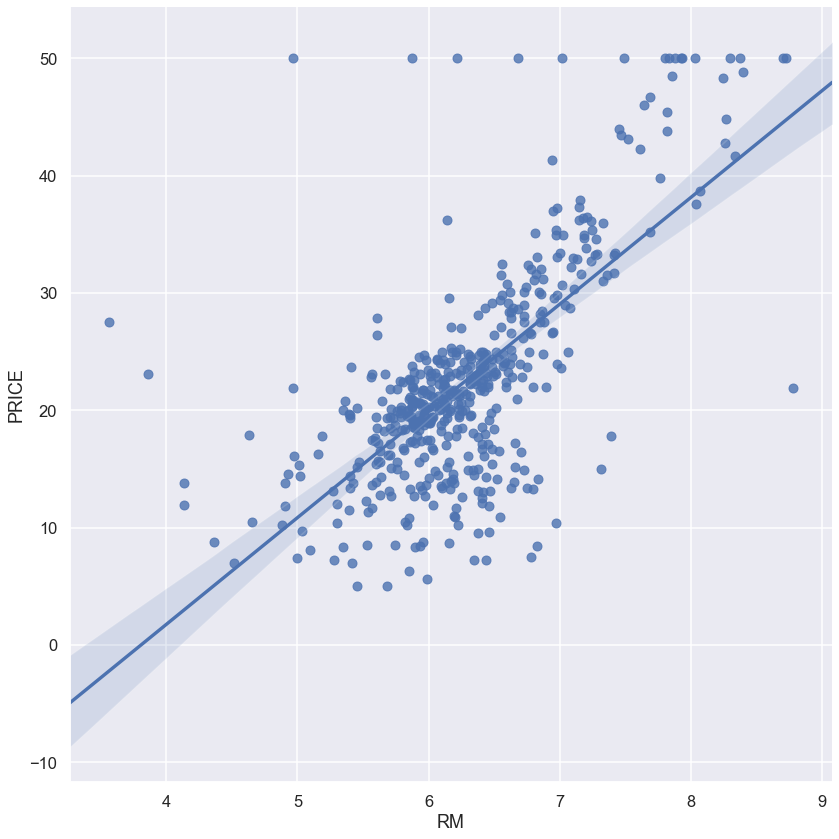

In [30]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('talk')
sns.lmplot(x='RM', y='PRICE', data = data, height=12)
plt.show()

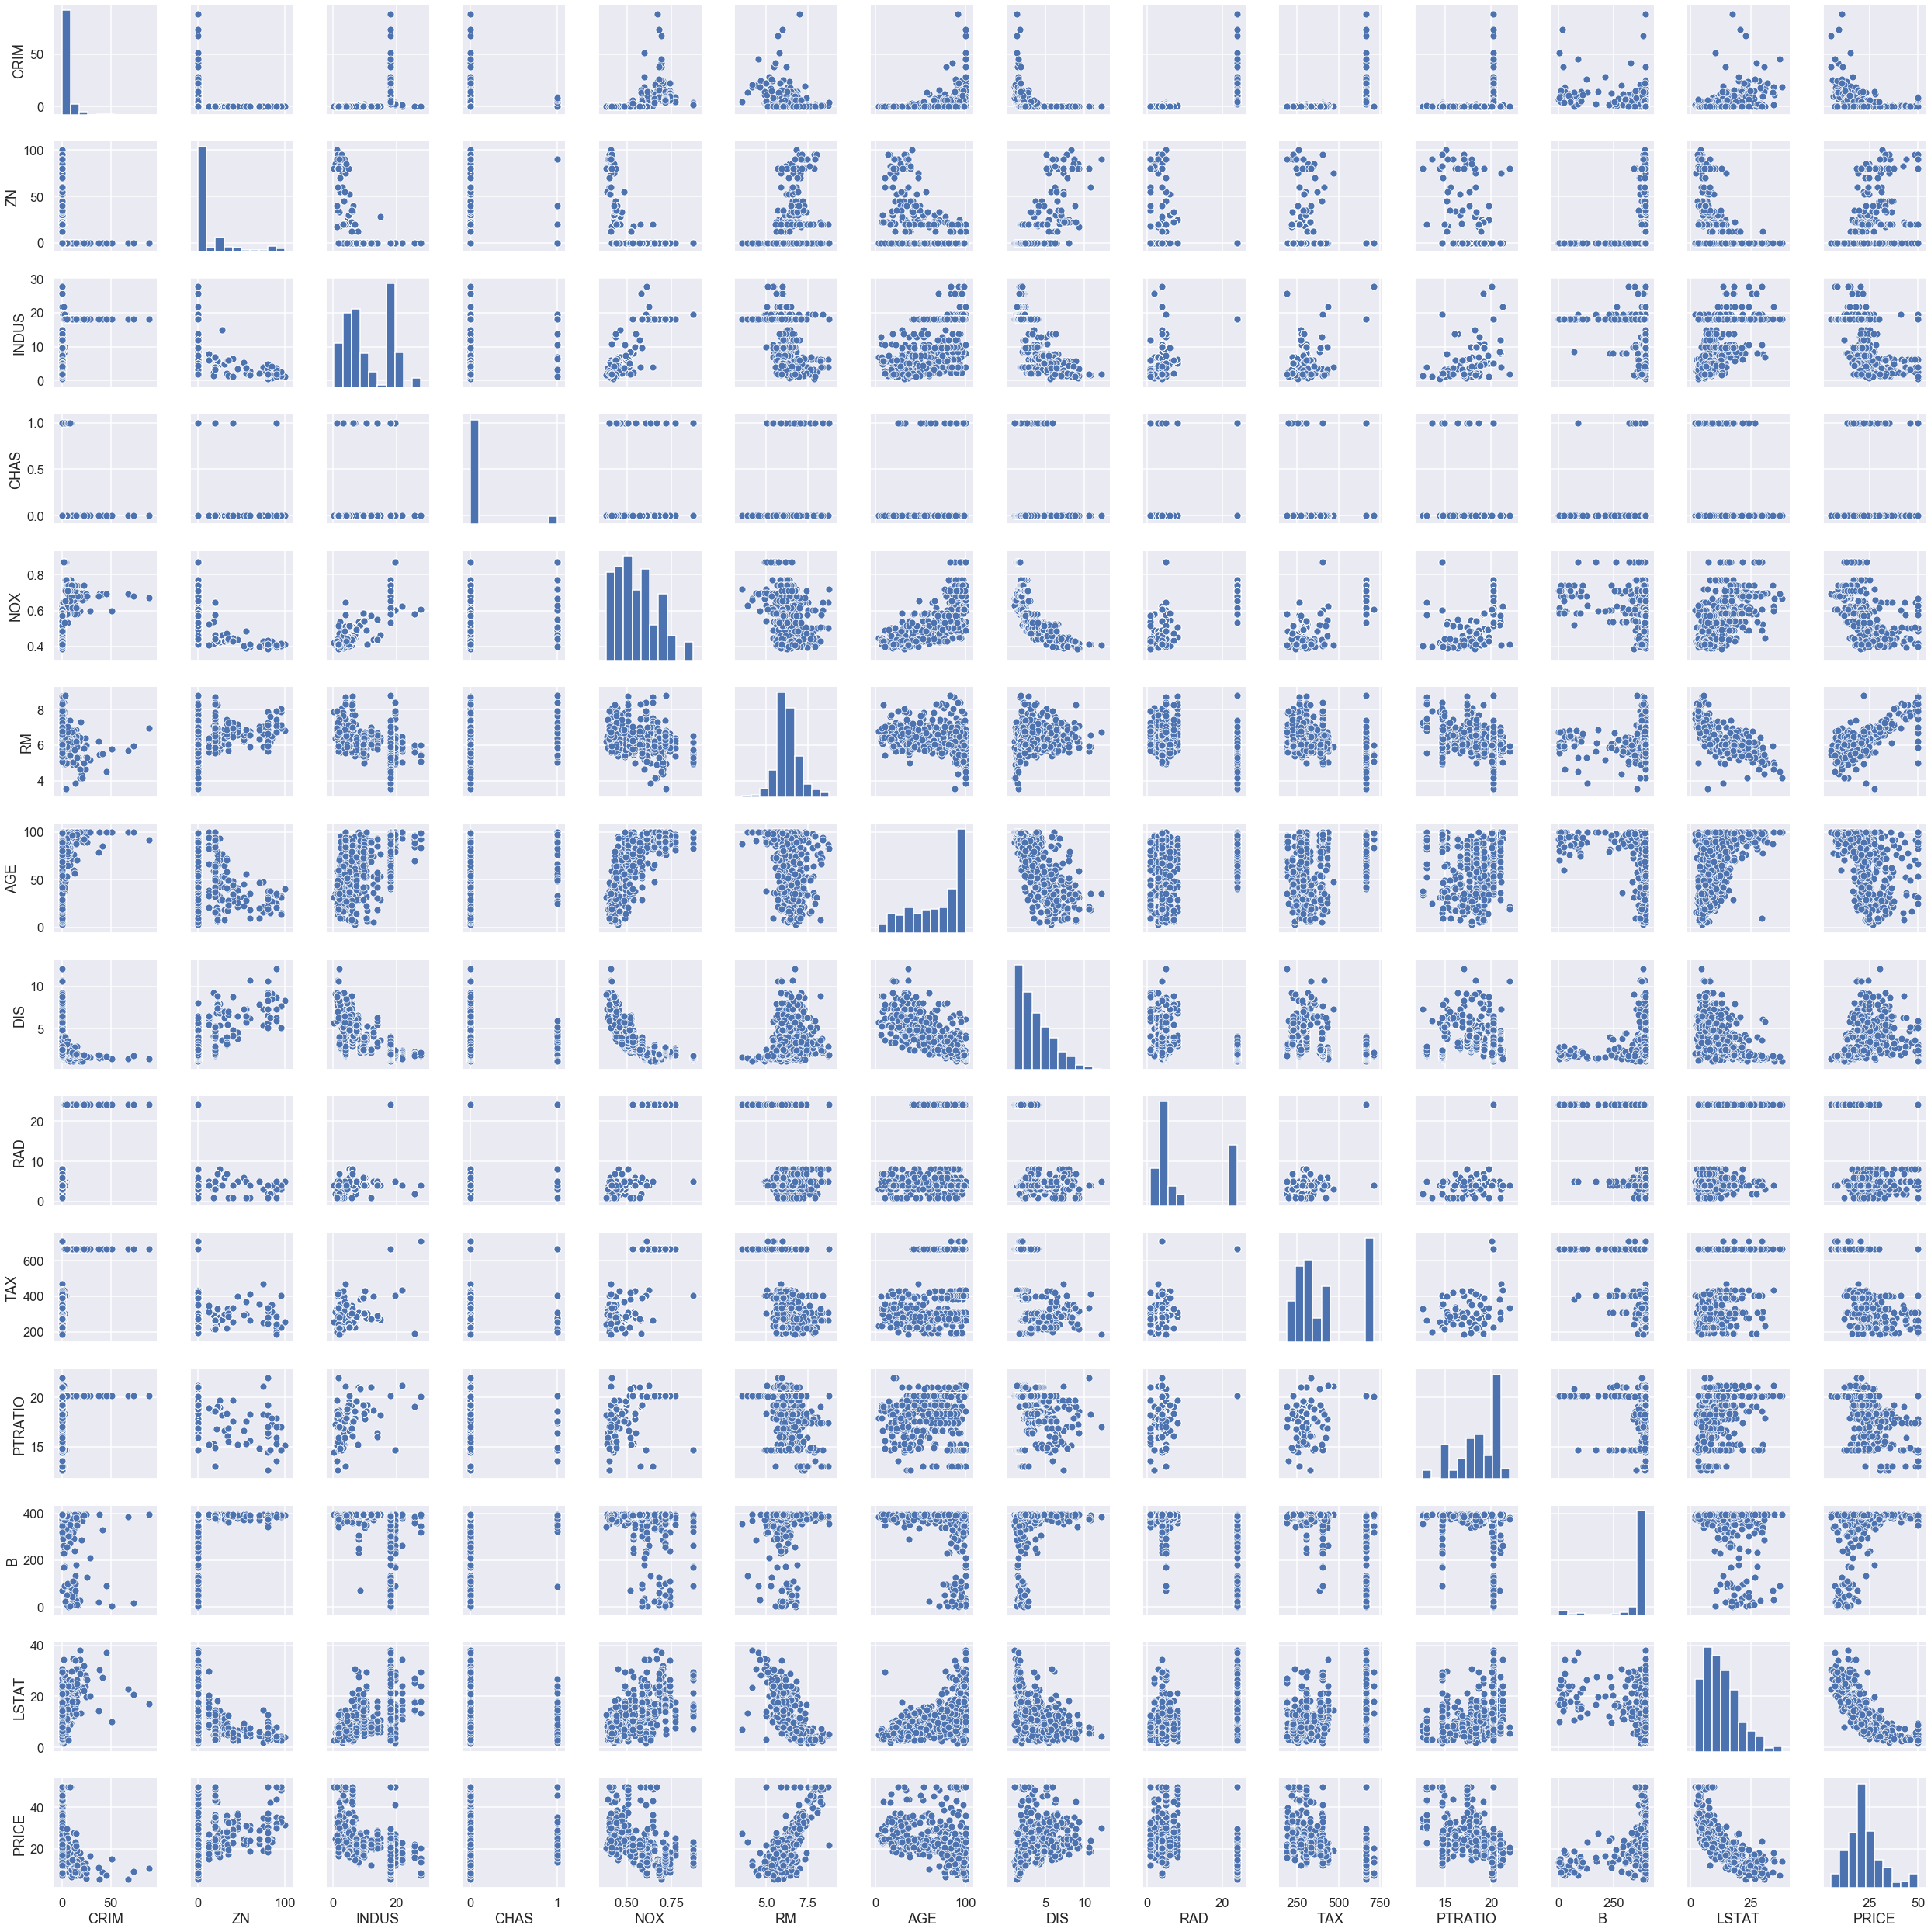

Wall time: 30.9 s


In [31]:
%%time

sns.pairplot(data)
plt.show()

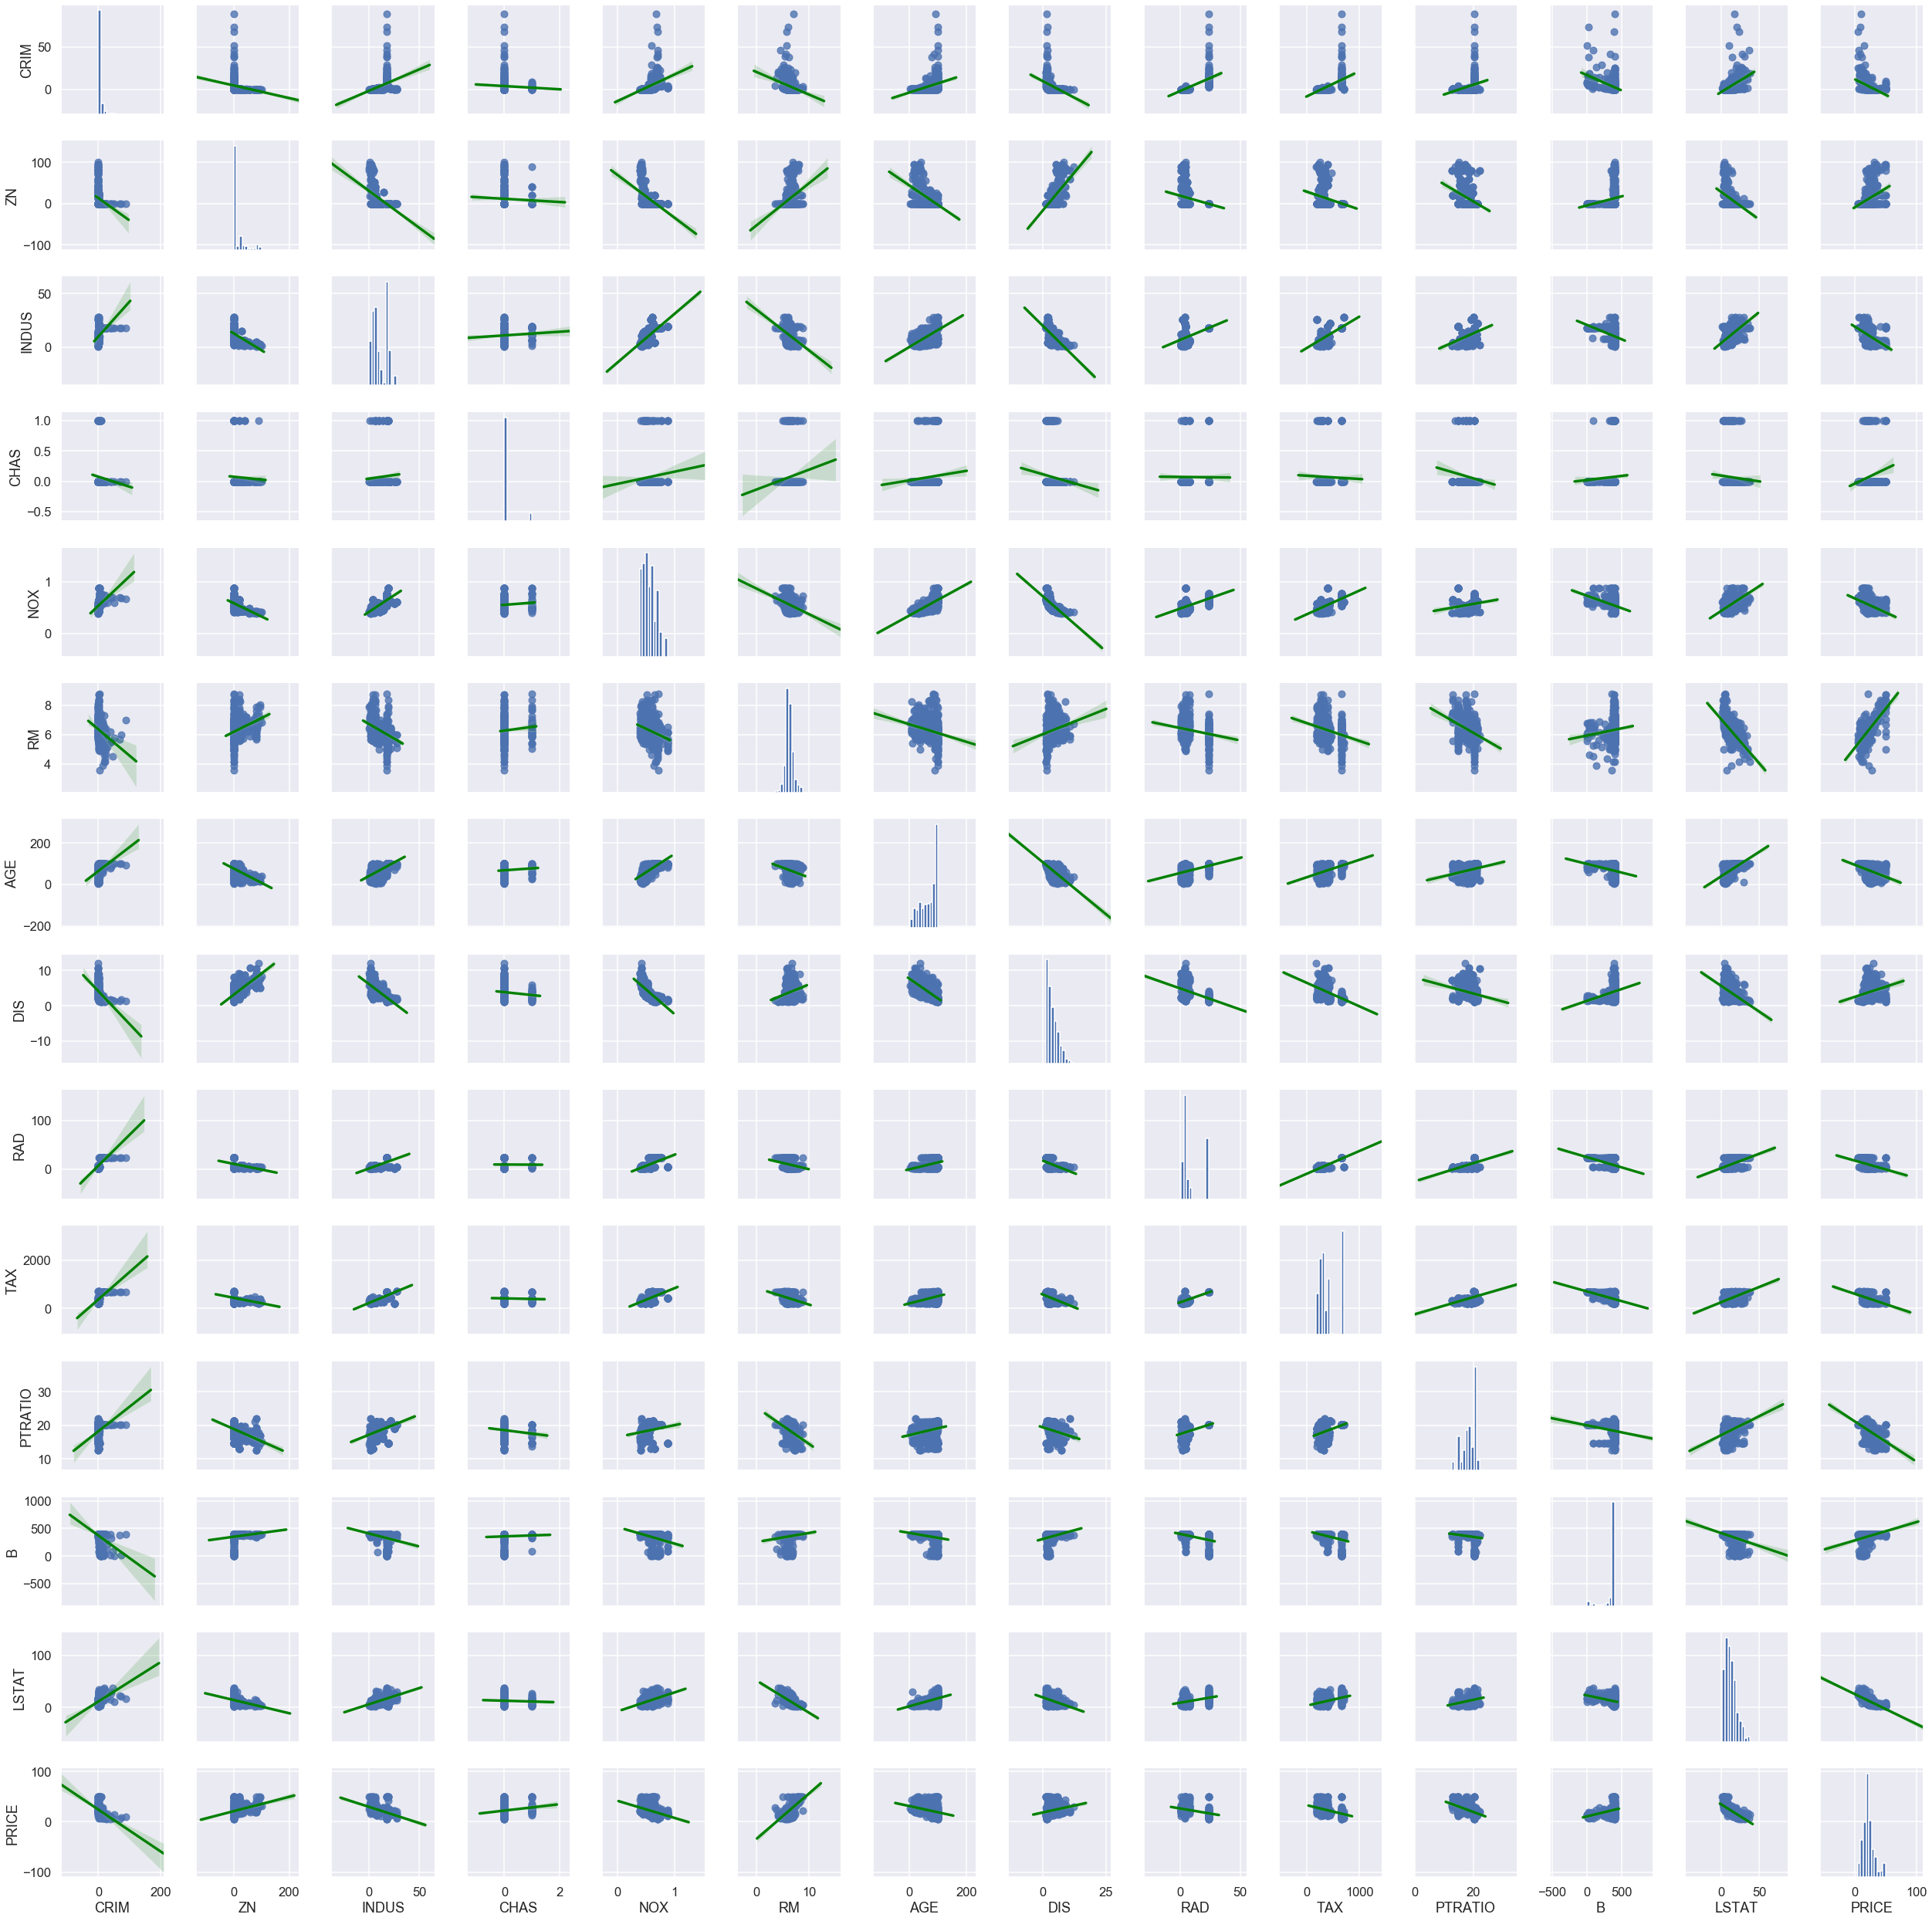

Wall time: 48 s


In [58]:
%%time

sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'green'}}) 
plt.show()

## Training & Test Dataset Split

In [32]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# % of training set
print('% of training set: ', len(X_train)/len(features))
# % of test set
print('% of test set: ', X_test.shape[0]/features.shape[0])

% of training set:  0.7984189723320159
% of test set:  0.2015810276679842


### Multivariable Regression

In [33]:
regr = LinearRegression()
regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))


print('Intercept', regr.intercept_)
print('Coefs for all columns: \n', pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']))

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115628
Intercept 36.53305138282439
Coefs for all columns: 
               coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626


## Data Transformations

In [35]:
data['PRICE'].skew()

1.1080984082549072

In [36]:
y_log = np.log(data['PRICE'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [37]:
y_log.skew()

-0.33032129530987864

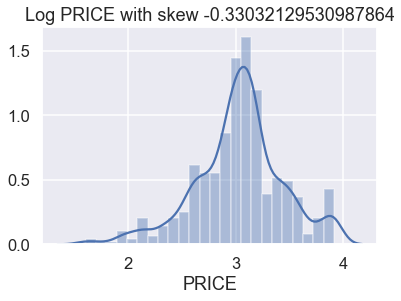

In [38]:
sns.distplot(y_log)
plt.title(f'Log PRICE with skew {y_log.skew()}')
plt.show()

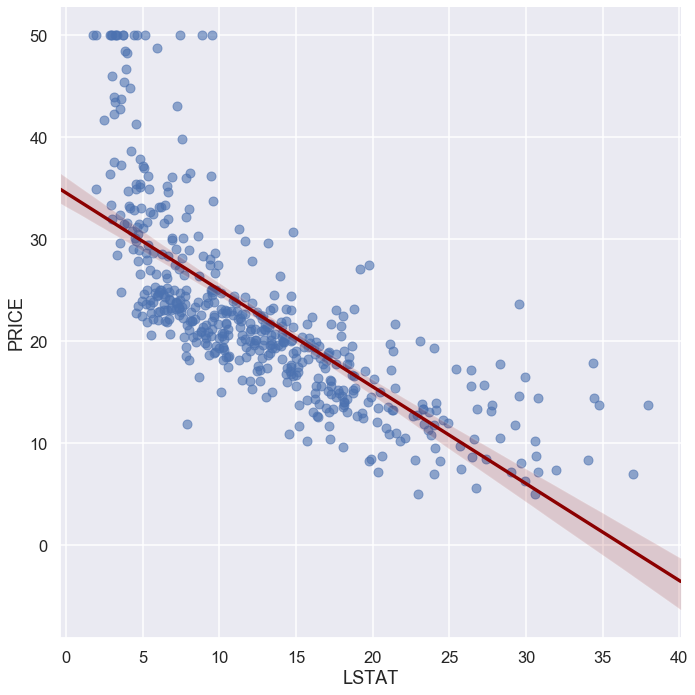

In [39]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=10, scatter_kws={'alpha': 0.6}, 
           line_kws={'color':'darkred'})
plt.show()

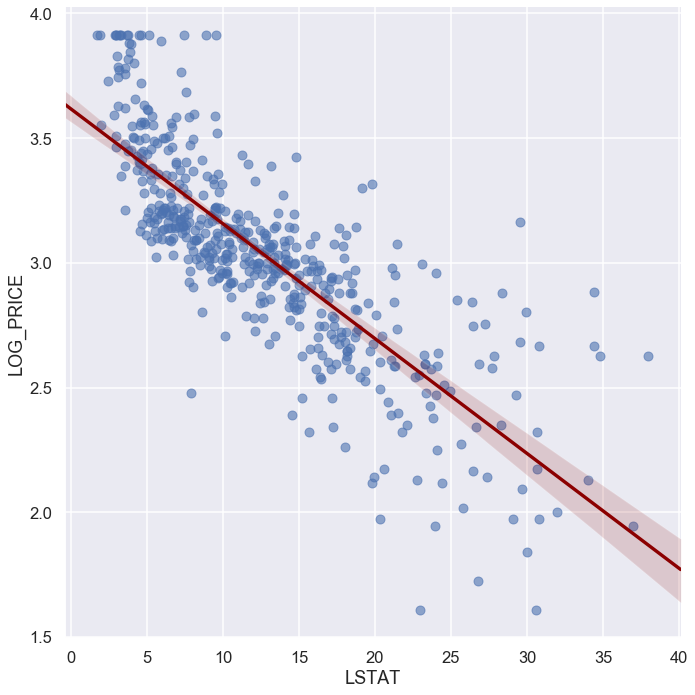

In [40]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height=10, scatter_kws={'alpha': 0.6}, 
           line_kws={'color':'darkred'})
plt.show()

### Regression using log prices

In [41]:
prices = np.log(data['PRICE']) # using log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))


print('Intercept', regr.intercept_)
print('Coefs for all columns: \n', pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']))


Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260724
Intercept 4.05994387177519
Coefs for all columns: 
              coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390


In [42]:
# Charles river Property Premium
np.e**0.080331

1.0836456950439142

### p values & Evaluating Coefficients

In [43]:
X_include_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_include_constant)
#regression results
results = model.fit()

#results.params
#results.pvalues
# Everything above 0.05 is insignificant
pd.DataFrame({'coef' : results.params,'p-values' : round(results.pvalues, 5)})

D:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


coef  p-values
const    4.059944   0.00000
CRIM    -0.010672   0.00000
ZN       0.001579   0.00861
INDUS    0.002030   0.44454
CHAS     0.080331   0.03824
NOX     -0.704068   0.00003
RM       0.073404   0.00011
AGE      0.000763   0.20917
DIS     -0.047633   0.00000
RAD      0.014565   0.00000
TAX     -0.000645   0.00005
PTRATIO -0.034795   0.00000
B        0.000516   0.00001
LSTAT   -0.031390   0.00000

### Testing for Multicollinearity

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _12 LSTAT $$

$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

In [44]:
type(X_include_constant)
variance_inflation_factor(exog=X_include_constant.values, exog_idx=1)


1.7145250443932485

In [45]:
for i in range(X_include_constant.shape[1]):
    print(variance_inflation_factor(exog=X_include_constant.values, exog_idx=i))
print('Loop done!')

597.5487126763895
1.7145250443932485
2.3328224265597584
3.943448822674636
1.0788133385000578
4.410320817897635
1.8404053075678568
3.3267660823099408
4.222923410477865
7.314299817005058
8.508856493040817
1.839911632651406
1.3386713255364715
2.812544292793034
Loop done!


In [46]:
vif = [] 
for i in range(X_include_constant.shape[1]):
    vif.append(variance_inflation_factor(exog=X_include_constant.values, exog_idx=i))
pd.DataFrame({'coef_name' : X_include_constant.columns,
              'vif' : np.around(vif, 3)})
#any list over 10 must be considored as problematic, over 5 might be problematic

coef_name      vif
0      const  597.549
1       CRIM    1.715
2         ZN    2.333
3      INDUS    3.943
4       CHAS    1.079
5        NOX    4.410
6         RM    1.840
7        AGE    3.327
8        DIS    4.223
9        RAD    7.314
10       TAX    8.509
11   PTRATIO    1.840
12         B    1.339
13     LSTAT    2.813

### Model simplification & Baysian Information Criteria

In [47]:
# Original model with log prices and all features
X_include_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_include_constant)
#regression results
results = model.fit()

# Everything above 0.05 is insignificant


original_coef = pd.DataFrame({'coef' : results.params,'p-values' : round(results.pvalues, 5)})
print('BIC: ', results.bic)
print('R-squared: ', results.rsquared)


BIC:  -139.74997769478875
R-squared:  0.7930234826697582


In [48]:
# Reduced model #1 Excluding INDUS and age
X_include_constant = sm.add_constant(X_train)
X_include_constant = X_include_constant.drop(['INDUS', 'AGE'], axis=1)
model = sm.OLS(y_train, X_include_constant)
#regression results
results = model.fit()

# Everything above 0.05 is insignificant


reduced_coef = pd.DataFrame({'coef' : results.params,'p-values' : round(results.pvalues, 5)})
# BIC should be more extremed for a better result
print('BIC: ', results.bic)
print('R-squared: ', results.rsquared)


BIC:  -149.49934294224656
R-squared:  0.7918657661852815


In [49]:
frames = [original_coef, reduced_coef]
pd.concat(frames, axis=1,sort=False)

coef  p-values      coef  p-values
const    4.059944   0.00000  4.035922   0.00000
CRIM    -0.010672   0.00000 -0.010702   0.00000
ZN       0.001579   0.00861  0.001461   0.01413
INDUS    0.002030   0.44454       NaN       NaN
CHAS     0.080331   0.03824  0.086449   0.02492
NOX     -0.704068   0.00003 -0.616448   0.00008
RM       0.073404   0.00011  0.076133   0.00004
AGE      0.000763   0.20917       NaN       NaN
DIS     -0.047633   0.00000 -0.052692   0.00000
RAD      0.014565   0.00000  0.013743   0.00000
TAX     -0.000645   0.00005 -0.000590   0.00005
PTRATIO -0.034795   0.00000 -0.033481   0.00000
B        0.000516   0.00001  0.000518   0.00001
LSTAT   -0.031390   0.00000 -0.030271   0.00000

### Residuals and Residual Plots

residuals type:  <class 'pandas.core.series.Series'>


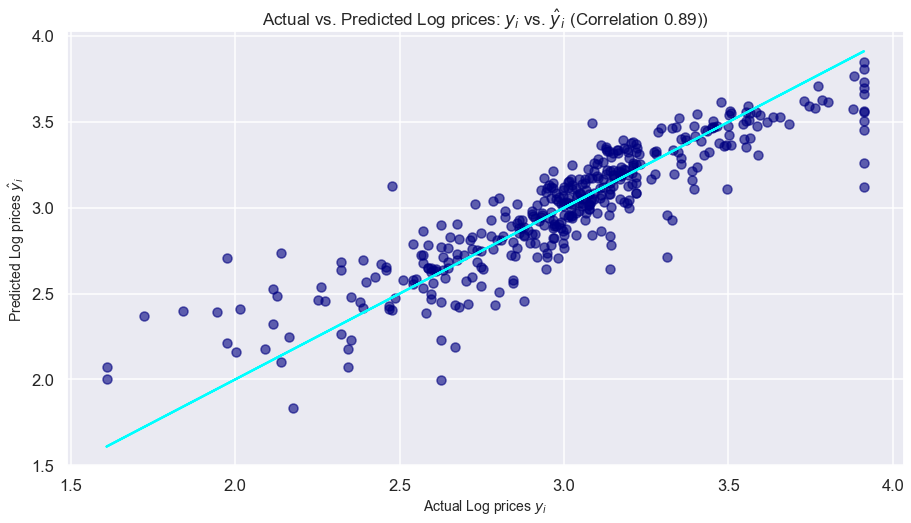

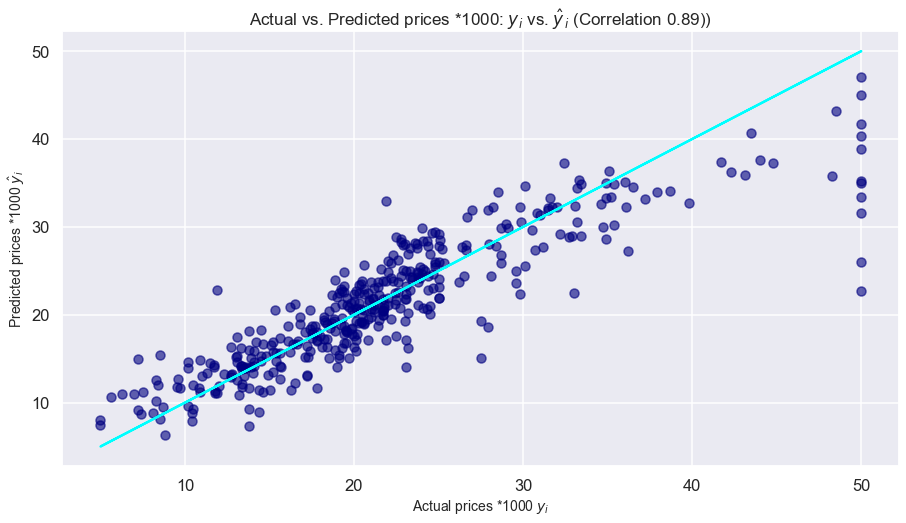

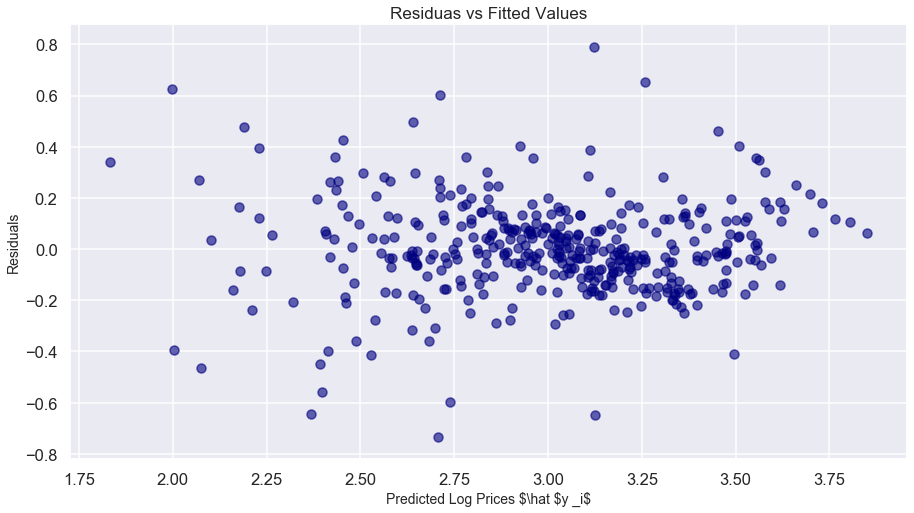

In [70]:
# Modified Model: transformed (using log prices) & simplified (dropping two features)
prices = np.log(data['PRICE']) # using log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using StatsModel
X_include_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_include_constant)
#regression results
results = model.fit()

# Residuals 
residuals = y_train - results.fittedvalues
results.resid
print('residuals type: ', type(residuals))

# Grapgh of Actual vs. Predicted Prices
correlation = round(y_train.corr(results.fittedvalues), 3)
plt.figure(figsize=(15, 8))
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)

plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual Log prices $y _i$' , fontsize=14)
plt.ylabel('Predicted Log prices $\hat y _i$' , fontsize=14)
plt.title(f'Actual vs. Predicted Log prices: $y _i$ vs. $\hat y _i$ (Correlation {correlation}))', fontsize=17)
plt.show()

plt.figure(figsize=(15, 8))
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='navy', alpha=0.6)

plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual prices *1000 $y _i$' , fontsize=14)
plt.ylabel('Predicted prices *1000 $\hat y _i$' , fontsize=14)
plt.title(f'Actual vs. Predicted prices *1000: $y _i$ vs. $\hat y _i$ (Correlation {correlation}))', fontsize=17)
plt.show()

# Residuals vs Predicted values

plt.figure(figsize=(15, 8))
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted Log Prices $\hat $y _i$' , fontsize=14)
plt.ylabel('Residuals' , fontsize=14)
plt.title('Residuas vs Fitted Values', fontsize=17)
plt.show()

# Mean Squared Error & R-squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

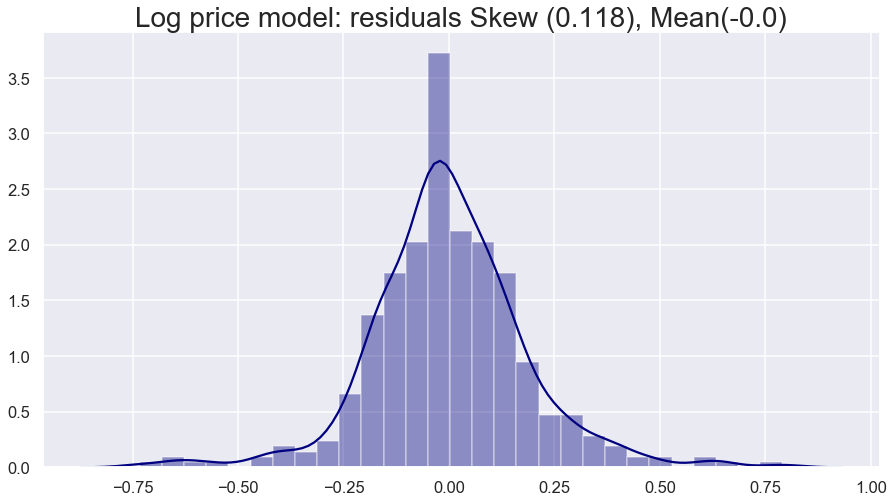

In [65]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

plt.figure(figsize=(15, 8))
sns.distplot(results.resid, color='navy')

plt.title(f'Log price model: residuals Skew ({resid_skew}), Mean({resid_mean})' , fontsize=28)
#plt.ylabel('Residuals' , fontsize=14)
#plt.title('Residuas vs Fitted Values', fontsize=17)
plt.show()

residuals type:  <class 'pandas.core.series.Series'>


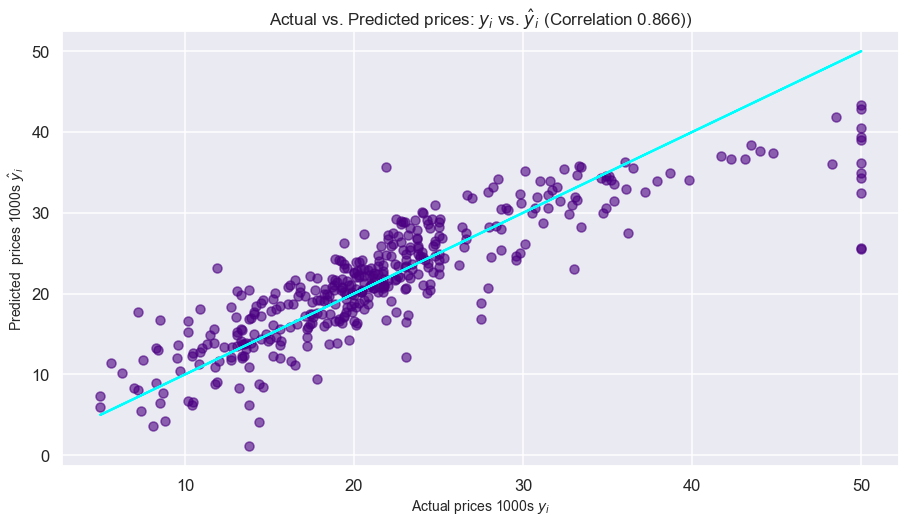

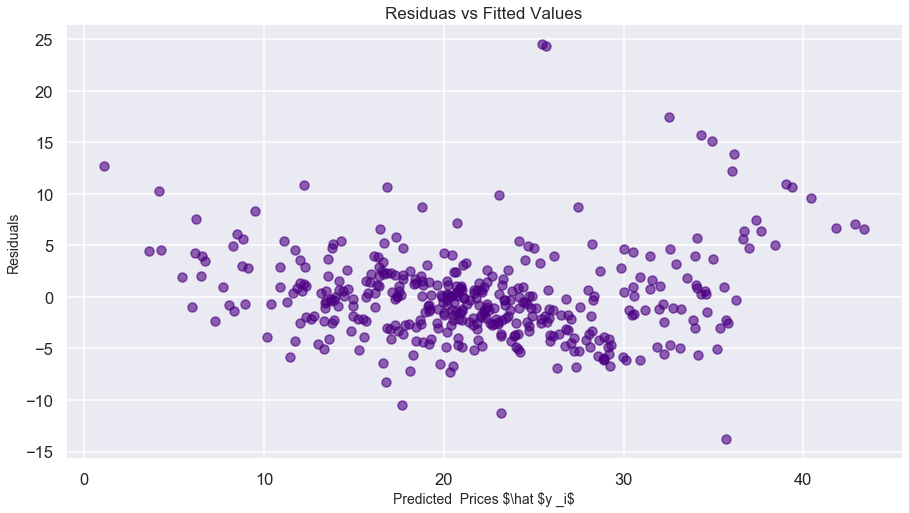

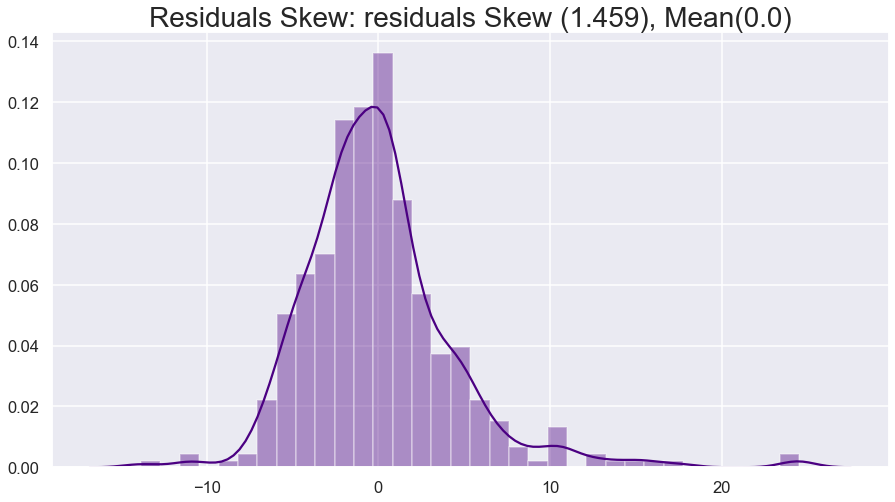

In [76]:
# Original Model: normal prices and all features
prices = data['PRICE'] # using log prices
features = data.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)


X_include_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_include_constant)
#regression results
results = model.fit()

# Residuals 
residuals = y_train - results.fittedvalues
results.resid
print('residuals type: ', type(residuals))

# Grapgh of Actual vs. Predicted Prices
correlation = round(y_train.corr(results.fittedvalues), 3)
plt.figure(figsize=(15, 8))
plt.scatter(x=y_train, y=results.fittedvalues, c='indigo', alpha=0.6)

plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices 1000s $y _i$' , fontsize=14)
plt.ylabel('Predicted  prices 1000s $\hat y _i$' , fontsize=14)
plt.title(f'Actual vs. Predicted prices: $y _i$ vs. $\hat y _i$ (Correlation {correlation}))', fontsize=17)
plt.show()

# Residuals vs Predicted values

plt.figure(figsize=(15, 8))
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)

plt.xlabel('Predicted  Prices $\hat $y _i$' , fontsize=14)
plt.ylabel('Residuals' , fontsize=14)
plt.title('Residuas vs Fitted Values', fontsize=17)
plt.show()

# Distribution of Residuals - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

plt.figure(figsize=(15, 8))
sns.distplot(results.resid, color='indigo')

plt.title(f'Residuals Skew: residuals Skew ({resid_skew}), Mean({resid_mean})' , fontsize=28)
#plt.ylabel('Residuals' , fontsize=14)
#plt.title('Residuas vs Fitted Values', fontsize=17)
plt.show()

# Mean Squared Error & R-squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)


In [80]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared],
             'MSE': [reduced_log_mse, full_normal_mse],
             'RMSE': np.sqrt([reduced_log_mse, full_normal_mse])},             
            index=['Reduced Log Model','Full Normal Price Model'])

R-Squared     MSE      RMSE
Reduced Log Model            0.792   0.035  0.187083
Full Normal Price Model      0.750  19.921  4.463295

In [88]:
print ('1 s.d. in log prices is: ', np.sqrt(reduced_log_mse))
print ('2 s.d. in log prices is: ', 2*np.sqrt(reduced_log_mse))

upper_bound= np.log(30) + 2*np.sqrt(reduced_log_mse)
print('upper bound in log prices for 95% prediction interval is: ', upper_bound)
print('upper bound in dollars for 95% prediction interval is: ', np.e**upper_bound * 1000)
lower_bound= np.log(30) - 2*np.sqrt(reduced_log_mse)
print('lower bound in log prices for 95% prediction interval is: ', lower_bound)
print('lower bound in dollars for 95% prediction interval is: ', np.e**lower_bound * 1000)

1 s.d. in log prices is:  0.18708286933869708
2 s.d. in log prices is:  0.37416573867739417
upper bound in log prices for 95% prediction interval is:  3.7753631203395495
upper bound in dollars for 95% prediction interval is:  43613.34233239937
lower bound in log prices for 95% prediction interval is:  3.0270316429847615
lower bound in dollars for 95% prediction interval is:  20635.886906824155
